# Previsão de seguros

Finalidade: gerar um algoritmo capaz de prever seguros

## importação e pré visualização

In [231]:
import pandas as pd

In [232]:
df_ins=pd.read_csv("insurance.csv", sep=",")
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [233]:
df_ins.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [234]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [235]:
df_ins.rename(columns={"age":"idade"}, inplace=True)
df_ins.rename(columns={"sex":"sexo"}, inplace=True)
df_ins.rename(columns={"bmi":"seguro saúde"}, inplace=True)
df_ins.rename(columns={"children":"crianças"}, inplace=True)
df_ins.rename(columns={"smoker":"fumante"}, inplace=True)
df_ins.rename(columns={"region":"região"}, inplace=True)
df_ins.rename(columns={"charges":"charges"},inplace=True)

In [236]:
df_ins

,idade,sexo,seguro saúde,crianças,fumante,região,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [237]:
df_ins.isna().sum()

idade           0
sexo            0
seguro saúde    0
crianças        0
fumante         0
região          0
charges         0
dtype: int64

Após uma importação e pré análise conclui-se que:
- o Data frame possui 6 freatures e um 1 target , sendo representado por "changes".

- Após a tradução das freatures obtemos: respectivamente:"idade","sexo","seguro saude","total de crianças" e "região".

- Este Data Frame esta totalmente preenchido.

# Tratamento dos dados

In [238]:
df_ins['fumante'].replace({"yes":1,"no":0},inplace=True)
df_ins['sexo'].replace({"male":1, "female":0}, inplace=True)
df_ins['região'].replace({'southwest':0, 'southeast': 1, 'northwest':2, 'northeast': 3}, inplace=True)

In [239]:
df_ins.head()

,idade,sexo,seguro saúde,crianças,fumante,região,charges
0,19,0,27.90,0,1,0,16884.92
1,18,1,33.77,1,0,1,1725.55
2,28,1,33.00,3,0,1,4449.46
3,33,1,22.70,0,0,2,21984.47
4,32,1,28.88,0,0,2,3866.86


In [240]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idade         1338 non-null   int64  
 1   sexo          1338 non-null   int64  
 2   seguro saúde  1338 non-null   float64
 3   crianças      1338 non-null   int64  
 4   fumante       1338 non-null   int64  
 5   região        1338 non-null   int64  
 6   charges       1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Após um leve tratamento dos dados :
- Todos os valores passaram a ser ou float ou inteiros.
- Sendo desta maneira 0=não fumante e 1= fumante.
- Sendo 0=mulher e 1=homem.
- E para as regiões 
southwest:0, southeast: 1, northwest:2, northeast: 3


# Análise e visualização

In [241]:
import plotly.express as px
df_ins_copia = df_ins.copy()

In [242]:
caixa_grafico=px.box(df_ins_copia,y="idade")
caixa_grafico.show()

In [243]:
caixa_grafico=px.box(df_ins_copia,y="seguro saúde")
caixa_grafico.show()

In [244]:
caixa_grafico=px.box(df_ins_copia,y="charges")
caixa_grafico.show()

In [245]:
df_ins_copia['sexo'] = df_ins_copia['sexo'].map({0: 'mulher', 1: 'homem'})
# Crie o gráfico de pizza
fig = px.pie(df_ins_copia, names='sexo', title='Distribuição de Sexo')

# Mostre o gráfico
fig.show()

In [246]:
df_ins_copia['fumante'] = df_ins_copia['fumante'].map({0: 'não fumante', 1: 'fumante'})
pizza_grafico=px.pie(df_ins_copia['fumante'],df_ins_copia['fumante'],
                     title="Taxa de pessoas fumantes")
pizza_grafico.show()

In [247]:
df_ins_copia['região']=df_ins_copia['região'].map({0:'southwest', 1:'southeast', 2:'northwest', 3:'northeast'})
pizza_grafico=px.pie(df_ins_copia['região'],df_ins_copia['região'])
pizza_grafico.show()

In [248]:
total_grafico=px.histogram(df_ins_copia['fumante'],df_ins_copia['região'], pattern_shape="fumante")
total_grafico.show()


In [249]:
fig=px.scatter(df_ins_copia,x='charges',y='idade')
fig.show()

In [251]:
fig = px.histogram(df_ins, x="idade", color="seguro saúde")
fig.show()

In [252]:
fig = px.bar(df_ins, y="sexo", x="fumante")
fig.show()

In [253]:
corr=df_ins.corr()
corr.style.background_gradient(cmap='Oranges')

,idade,sexo,seguro saúde,crianças,fumante,região,charges
idade,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sexo,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
seguro saúde,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
crianças,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
fumante,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
região,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


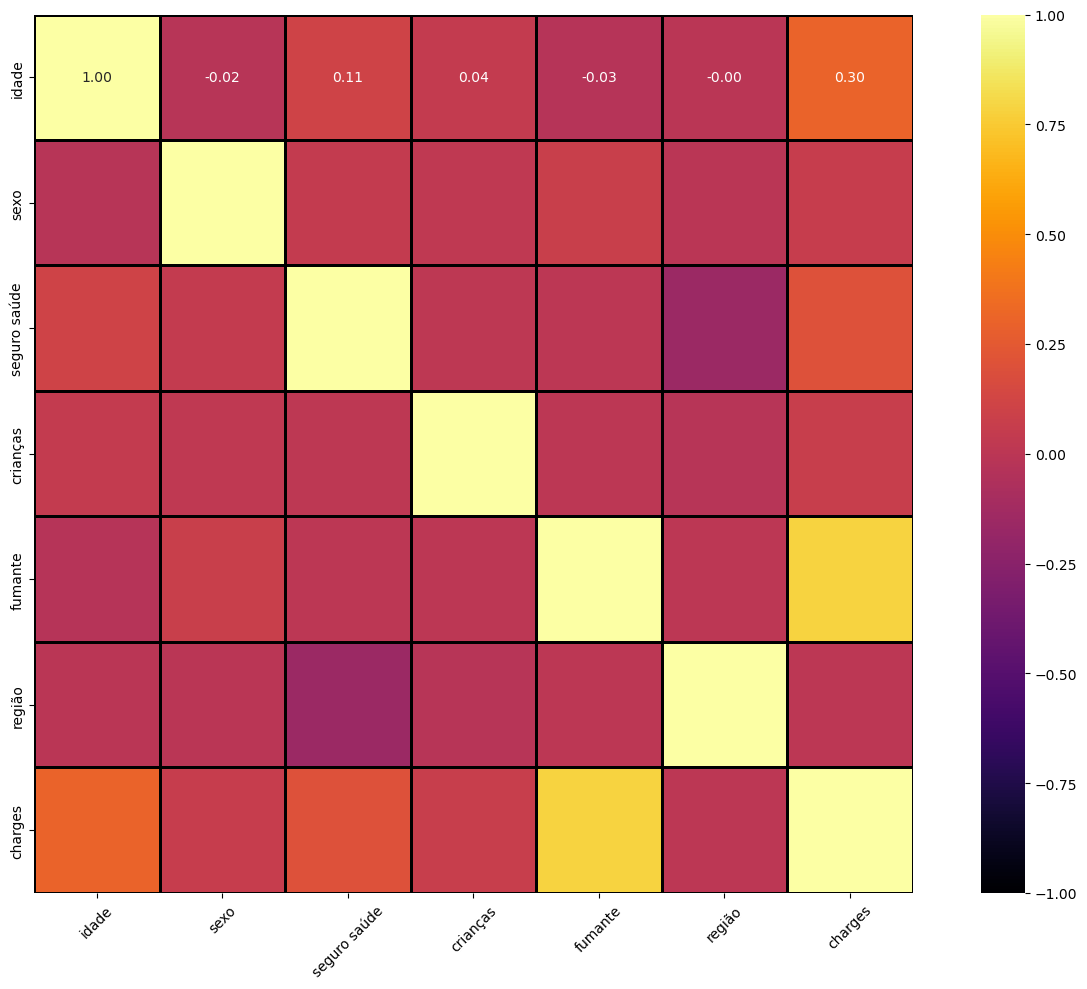

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 10));
sns.heatmap(corr, vmax=1,vmin=-1,center=0, linewidths=0.8, linecolor='black',cmap='inferno',annot=True,square=True ,fmt=".2f", annot_kws={'size':10});
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2);
plt.xticks(rotation=45);
plt.tight_layout();

Conclusão

# Modelo 

In [255]:
from sklearn.model_selection import train_test_split
X=df_ins.drop('charges', axis=1)
y=df_ins['charges']
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=43)

In [256]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_train,y_train)
predicao=modelo.predict(X_test)




In [257]:
modelo.intercept_

-12889.897442734558

In [258]:
modelo.coef_

array([  255.57614087,   124.96481438,   323.29163068,   497.49273342,
       23954.33378299,   376.09558492])

In [259]:
# Coeficiente de Determinação dados de treino
modelo.score(X_train, y_train) #Classificação: acuracia. Regressão: score

0.7635858928710806

In [260]:
# Coeficiente de Determinação dados de teste
modelo.score(X_test, y_test)

0.6939736014653857

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
mae = mean_absolute_error(y_test, predicao)
mse = mean_squared_error(y_test, predicao)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predicao)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 4476.476266304165
Mean Squared Error (MSE): 43047481.54496098
Root Mean Squared Error (RMSE): 6561.057959274631
R-squared (R2): 0.6939736014653857


In [262]:
from lazypredict.Supervised import LazyRegressor

In [263]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


 50%|█████     | 21/42 [00:01<00:01, 15.03it/s]c:\Users\nickg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

 71%|███████▏  | 30/42 [00:02<00:00, 14.79it/s]c:\Users\nickg\anaconda3\Lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning:

The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.

100%|██████████| 42/42 [00:02<00:00, 14.10it/s]


                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.78       0.78   5553.23   
HistGradientBoostingRegressor                0.76       0.77   5697.06   
LGBMRegressor                                0.76       0.77   5709.19   
RandomForestRegressor                        0.75       0.75   5882.06   
BaggingRegressor                             0.74       0.75   5961.49   
XGBRegressor                                 0.73       0.74   6052.24   
ExtraTreesRegressor                          0.73       0.74   6090.53   
KNeighborsRegressor                          0.73       0.74   6098.42   
AdaBoostRegressor                            0.73       0.73   6125.47   
PoissonRegressor                             0.69       0.70   6514.83   
LassoLarsIC                                  0.69       0.69   6554.82   
OrthogonalMatchingPursuitCV           

In [265]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
reg.predict(X_test[1:2])

array([7369.40893958])

In [266]:
reg.score(X_test, y_test)

0.7808229398288153

In [267]:
import joblib as jb